## Question No. 1: (Exploring data) [20% Marks]

# i. How many training and test examples are there? How many positive and negative examples are there in the training dataset?


In [6]:
#import packages foe this part
import csv
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
# for question v
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score,roc_curve, precision_recall_curve,roc_auc_score,average_precision_score


In [7]:
# load the file 
Xtrain = np.loadtxt("Xtrain.csv")# load Xtrain
Ytrain = np.loadtxt("Ytrain.csv")#load Ytrain
Xtest = np.loadtxt("Xtest.csv")# load Xtest
# count the number of examples in each data set
print("Answer 1")
print("The number of  X training examples is: ", len(Xtrain))
print("The number of Y training examples is: ",len(Ytrain))
print("The number of  X test examples is: ",len(Xtest))

# count  negative and positive objects in Ytrain 
n_positive=np.count_nonzero(Ytrain==1)
n_negative=np.count_nonzero(Ytrain==-1)
print("Answer 2")
print("The number of positive examples is: ",n_positive)
print("The number of negative examples is: ",n_negative)

Answer 1
The number of  X training examples is:  3000
The number of Y training examples is:  3000
The number of  X test examples is:  3000
Answer 2
The number of positive examples is:  611
The number of negative examples is:  2389


ii. Show at least 10 randomly selected objects of each class using plt.matshow by reshaping the flattened array to 28x28. What are your observations about the nature of the data? Also show 10 randomly selected objects from the test set. Do you see any issues in the data that may limit the generalization performance of your classifier?

positive object


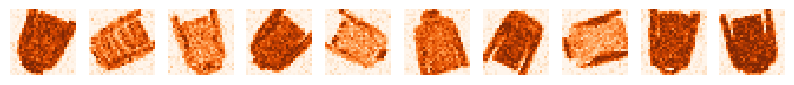

Negative object


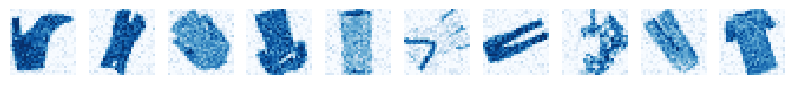

Test object


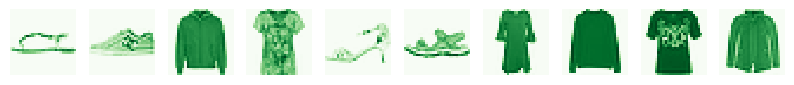

In [8]:
# show 10 randomly selected objetcs
# random objects can not use np.choice.sample/choice because the object is not 1-dimensional.
positive=np.where(Ytrain==1)[0]
negative=np.where(Ytrain==-1)[0]
#Get positive and negative sublist in Xtrain
Xp=[]
Xn=[]
for i in range(len(positive)):
    index=positive[i]
    Xp.append(Xtrain[index])
for i in range(len(negative)):
    index=negative[i]
    Xn.append(Xtrain[index])



def sub_sample(dataset, n):
    set_n = len(dataset)
    sub_index = random.sample(range(1, set_n), n)
    sub_data =np.array(dataset)[sub_index]
    
    return sub_data

def show_sub_sample(dataset):
    fig=plt.figure(figsize=(28,28))
    for i in range(1,11):
        
        plt.matshow(dataset[i-1].reshape((28,28)),cmap=plt.cm.Blues)
    plt.show()
#get 10 random object from positive/negative set
randomp=sub_sample(Xp,10)
randomn=sub_sample(Xn,10)
#get 10 random object from Xtest set

randomt=sub_sample(Xtest,10)
#Show positive examples
fig,ax=plt.subplots(1,10,figsize=(10,1))
print("positive object")
for i in range(10):
    ax[i].matshow(randomp[i].reshape((28,28)),cmap=plt.cm.Oranges)
    ax[i].axis("off")
plt.show()
#Show negative examples
fig,ax=plt.subplots(1,10,figsize=(10,1))
print("Negative object")
for i in range(10):
    ax[i].matshow(randomn[i].reshape((28,28)),cmap=plt.cm.Blues)
    ax[i].axis("off")
plt.show()
#Show test examples
print("Test object")
fig,ax=plt.subplots(1,10,figsize=(10,1))
for i in range(10):
    ax[i].matshow(randomt[i].reshape((28,28)),cmap=plt.cm.Greens)
    ax[i].axis("off")
plt.show()


Generalization

It is clear that positive objects are all tops, and negative objects are non-coats.
Test objects are more clear and train objects are more blured. The test data and train data are significantly different with each other. Train set doesn't have enough data describing the object, so this could cause underfitting.

iii. Which performance metric (e.g., accuracy, AUC-ROC and AUC-PR) should be used for this problem? Give the reasoning behind your choice(s).

  Answer:
  AUC-PR is better for this task
  Accuracy is not good in this case because the data set is not balanced. In imbalanced data, some bad classfier will have good accuracy frate. Classifier only predicts majority will have high accuracy. accuracy rate will be high if the correct prediction for the majority calss is high, even if all prediction was wrong for the minority class. For example, in this case zeroR classifier's accuracy is 79.6%. 
  AUC-ROC  is also not good.AUC-ROC takes both positive class and negative class.   AUC-ROC wants to find out the thereshold when TP rate is high and FP rate is low. When data set is imbalanced, for example includes more negative instances, an increase on FP rate  will not lead to a significant change on the AUC-ROC curve， but the precision will significantly changed.  When FP rate is low and TP rate is high, there could still be many negative instances wrongly classfied as positive.
  AUC-PR is more suitable as the data set is not balanced. The AUC-PR curve shows precision vs recall. The PR curve is more sensitive to the precision rate.In this task, there is more negative instances, precision rate shows how many positive predict are actually positive. 
  For example, when TP rate is 0.9 and FP rate is 0.1.The precision is only 0.69.  When FP rate becomes 0.01. The ROC curve will not have significant change.But the PR curve will change alot as precision will become 0.94. So the PR curve can better represent the performance of model for this data set.

iv. What is the expected accuracy of a random classifier (one that generates random labels for a given example) for this problem over the training and test datasets? Demonstrate (either by a mathematical or statistical proof or a programming experiment) why this would be the case.

In [9]:
# build random_classifier(-1,1) for input size
def random_classifier(data):
    size=len(data)
    random_list = []
    for i in range(size):
        random_list.append(random.randrange(-1,2,2))# generate random -1 and 1
    return random_list
accuracy_list=[]

def random_accuracy(data):
    correct=0
    data=data
    size=len(data)
    random_list=random_classifier(data)
    # both methods can be used to calculate accuracy
    for i in range(size):
        if random_list[i]==data[i]:
            correct+=1
    accuracy=correct/size
    accuracy_list.append(accuracy)
    # get accuracy score using accuracy_score function
    accuracy2=accuracy_score(Ytrain,random_list)
    return accuracy2
# expected accuracy for specific n
def expected_accuracy(n,data):
    accuracy_list=[]
    for i in range(n):
        accuracy_list.append(random_accuracy(data))
    expected_accuracy=sum(accuracy_list)/len(accuracy_list)
    return expected_accuracy


print("Answer")
print("the expected accuracy of random classifier for train data is ", expected_accuracy(10,Ytrain))




Answer
the expected accuracy of random classifier for train data is  0.49853333333333333


For random classifier, the accuracy is 0.5 because for both negative and positive instances, the prediction has 50% chance to be the same and 50% chance to be different. This will not be affected by the imbalance of data set.

v. What is the AUC-ROC and AUC-PR of a random classifier for this problem over the training and test datasets? Demonstrate (either by a mathematical or statistical proof or a programming experiment) why this would be the case.

In [11]:
#  calculate accuracy
#generate a probability estimate list with 3000 objects, value=0.5
prob=[0.5]*3000

def random_roc(data):
    # use roc_auc_score to get auc roc
    roc=roc_auc_score(Ytrain,prob)
    
    return roc


def random_pr(data):
    
    # use average_precision_score  to calculate average_precision
    average_precision = average_precision_score(Ytrain, prob)
    return average_precision
    

def expected_roc_pr(n,data):
    pr_list=[]
    roc_list=[]
    for i in range(n):
        roc_list.append(random_roc(data))
        pr_list.append(random_pr(data))
    expected_roc=sum(roc_list)/len(roc_list)
    expected_pr=sum(pr_list)/len(pr_list)
    print("Expected roc is",expected_roc)
    print("Expected pr is",expected_pr)
print(" Random roc and pr rate")
print("roc" , random_roc(Ytrain))
print("pr",random_pr(Ytrain))
print("computing experiment")
expected_roc_pr(10,Ytrain)
print(average_precision_score(Ytrain,prob))

 Random roc and pr rate
roc 0.5
pr 0.20366666666666666
computing experiment
Expected roc is 0.5
Expected pr is 0.20366666666666666
0.20366666666666666


The classifier is random guess classifier, auc- pr is low because it shows average precision,that supports the conclusion in iii that pr is the best for this case. AUC-ROC =0.5 means TPR is not better than FPR, suggesting the model has no discrimination between positive and negative instances. PR smaller than 0.5 means precision is smaller than 50%,because of the data set is imbalanced , it is just the ratio of positive instances in the data set.
Proof
AUC-ROC : 1*1*0.5=0.5
Recall=TP/(TP+FN) is constant value
AUC-PR is Average Precision=TP/TP+FP=611*0.5/(611+2389)*0.5=611/3000=0.203
ROC on test set is also 0.5.
PR on test set can not be calculated because we don't know the ratio between positive and negative instances in test set.


### Q2Nearest Neighbor Classifier
#Perform 5-fold stratified cross-validation (https://scikit- learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) over the training dataset using the k = 1 nearest neighbour classifier and answer the following questions:

In [12]:
# Packages and data for Question 2
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score

from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve


In [13]:
# to ignore the warning
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)


i. What is the accuracy, balanced accuracy, AUC-ROC and AUC-PR for each fold using this classifier? Show code to demonstrate the results. Calculate the average and standard deviation for each metric across all folds and show these in a single table. As the KNN classifier in sklearn does not support decision_function, be sure to understand and use the predict_proba function for AUC-ROC and AUC-PR calculations or plotting.

In [14]:

# get the skf folder
def skf_get(Xtrain,Ytrain):
    skf = StratifiedKFold(n_splits=5,shuffle = True)
    xtrain=[]
    ytrain=[]
    xtest=[]
    ytest=[]
    for i,(train_index, test_index) in enumerate(skf.split(Xtrain, Ytrain)):
        xtrain.append(Xtrain[train_index])
        ytrain.append(Ytrain[train_index])
        ytest.append(Ytrain[test_index])
        xtest.append(Xtrain[test_index])
    return xtrain,ytrain,xtest,ytest
# get the predict value and predict probability

def knn_predict(Xtrain,Ytrain,Xtest):
    knn = KNeighborsClassifier(n_neighbors=3) 
    knn.fit(Xtrain, Ytrain)
    predict_value = knn.predict(Xtest)
    pro_estimate=knn.predict_proba(Xtest)
    return predict_value,pro_estimate[:,1]

def get_performance(ytest,predict_value,pro_estimate):
    
    # accuracy
    accuracy = accuracy_score(ytest, predict_value)
    # balanced accuracy
    balanced = balanced_accuracy_score(ytest, predict_value)
    # ROC value fpr and tpr
    fpr, tpr, thres_roc = roc_curve(ytest, pro_estimate)
    
    roc=roc_auc_score(ytest,pro_estimate)
    # PR value precision and recall
    precision, recall, thres_pr = precision_recall_curve(ytest, pro_estimate)
    
    pr=average_precision_score(ytest,pro_estimate)
    
    return accuracy,balanced,roc,pr,fpr,tpr,precision,recall

def summary_classifier(Xtrain,Ytrain):
    predict_list=[]
    accuracy_list=[]
    balanced_list=[]
    roc_list=[]
    pr_list=[]
    fpr_list=[]
    tpr_list=[]
    precision_list=[]
    recall_list=[]
    xtrain,ytrain,xtest,ytest=skf_get(Xtrain,Ytrain)
    for i in range(5):
        predict_knn,predict_p=knn_predict(xtrain[i],ytrain[i],xtest[i])
        
        #Get performance for each folder
        accuracy,balanced,roc,pr,fpr,tpr,precision,recall=get_performance(ytest[i],predict_knn,predict_p)
        #Print the results
        print("Performance for folder",i+1)
        print("Accuracy is",accuracy)
        print("balanced accuracy is",balanced)
        print("AUC-ROC is",roc)
        print("AOC-PR is ",pr)
        
        print()
        # Get the list for calculate mean and std
        accuracy_list.append(accuracy)
        balanced_list.append(balanced)
        roc_list.append(roc)
        pr_list.append(pr)
        fpr_list.append(fpr)
        tpr_list.append(tpr)
        precision_list.append(precision)
        recall_list.append(recall)
    return accuracy_list,balanced_list,roc_list,pr_list,fpr_list,tpr_list,precision_list,recall_list




In [15]:
# load the file again, so we don't need to run the code in Q1
Xtrain2 = np.loadtxt('./Xtrain.csv')
Ytrain2 = np.loadtxt('./Ytrain.csv')

test0=summary_classifier(Xtrain2,Ytrain2)

Performance for folder 1
Accuracy is 0.885
balanced accuracy is 0.8179401879415598
AUC-ROC is 0.9053775979148089
AOC-PR is  0.7155616133644345

Performance for folder 2
Accuracy is 0.8433333333333334
balanced accuracy is 0.7795802181219562
AUC-ROC is 0.8777179504767131
AOC-PR is  0.5836227899913689

Performance for folder 3
Accuracy is 0.865
balanced accuracy is 0.7809692022772481
AUC-ROC is 0.8896957953220386
AOC-PR is  0.6301706899979251

Performance for folder 4
Accuracy is 0.8766666666666667
balanced accuracy is 0.8188147335208176
AUC-ROC is 0.8809932094107964
AOC-PR is  0.6527778393147246

Performance for folder 5
Accuracy is 0.89
balanced accuracy is 0.8161783504627499
AUC-ROC is 0.8990387073682058
AOC-PR is  0.6776366923630839



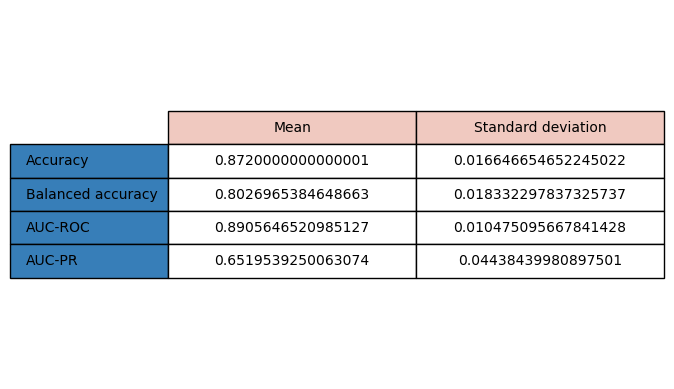

In [18]:
# get the performance list
def plot_mean_sd(data):
    accuracy_list,balanced_list,roc_list,pr_list,fpr_list,tpr_list,precision_list,recall_list=data
    # get the sd and mean 
    data = [[np.mean(accuracy_list), np.std(accuracy_list)], 
           [np.mean(balanced_list), np.std(balanced_list)], 
           [np.mean(roc_list), np.std(roc_list)], 
           [np.mean(pr_list), np.std(pr_list)]]

    rows = ['Accuracy', 'Balanced accuracy', 'AUC-ROC', 'AUC-PR']
    rowColours=["#377eb8","#377eb8","#377eb8","#377eb8"]

    columns = ['Mean', 'Standard deviation']
    colColours=["#F0C9C0","#F0C9C0"]
    fig, ax = plt.subplots()
    ax.axis('tight')
    ax.axis('off')
    result_table = ax.table(cellText=data,rowLabels=rows,colLabels=columns, colColours=colColours,
         rowColours=rowColours,cellLoc = 'center',
                         loc='center')

    result_table.scale(1,2)
    plt.show()

plot_mean_sd(test0)  
  




ii. Plot the ROC and PR curves for one fold. What are your observations about the ROC and PR curves?

ROC= 0.905


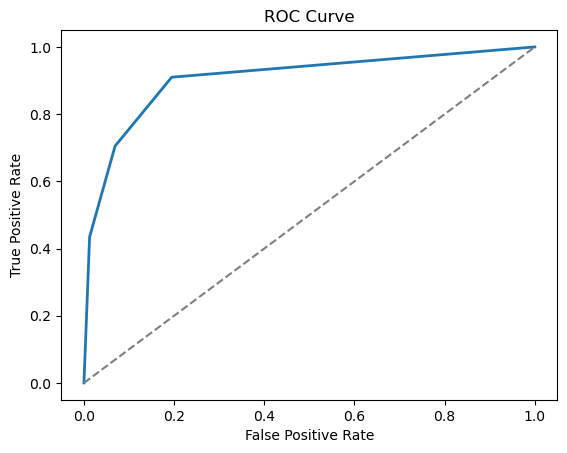

PR= 0.795


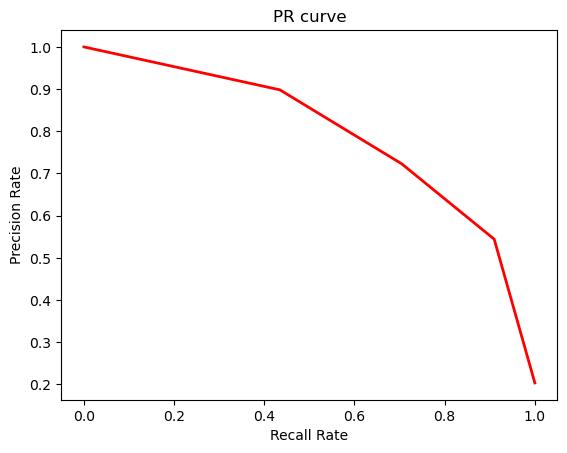

In [19]:
# Creat the figure
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
def plot_curve(data):
    accuracy_list,balanced_list,roc_list,pr_list,fpr_list,tpr_list,precision_list,recall_list=data
    # plot roc curve
    print("ROC=",round(auc(fpr_list[0], tpr_list[0]),3))
    plt.plot(fpr_list[0],tpr_list[0], linewidth=2)
    plt.plot([0,1],[0,1],linestyle='--',color='grey')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
    plt.title("ROC Curve")
    plt.show()
    
    # plot pr curve
    print("PR=",round(auc(recall_list[0], precision_list[0]),3))
    plt.plot(recall_list[0], precision_list[0], linewidth=2, color="red")
    plt.xlabel("Recall Rate")
    plt.ylabel("Precision Rate")

    plt.title("PR curve")
    plt.show()
    
            
                        
plot_curve(test0)


In [ ]:
# Creat the figure
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
def plot_curve(data):
    accuracy_list,balanced_list,roc_list,pr_list,fpr_list,tpr_list,precision_list,recall_list=data
    # plot roc curve
    print("ROC=",round(auc(fpr_list[0], tpr_list[0]),3))
    plt.plot(fpr_list[0],tpr_list[0], linewidth=2)
    plt.plot([0,1],[0,1],linestyle='--',color='grey')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
    plt.title("ROC Curve")

    plt.show()

ROC curve shows the gap between TP rate and FP rate it is better when the curve become more concave to the top left, suggesting true positive rate is larger than false positive rate.PR rate shows the relationship between precision rate and recall rate,  we can see that when recall rate increases the PR rate will significantly drop. Both PR and ROC value are larger than0.5. This means the classifier is better than random classsifier.

iii. What is the impact of various forms of pre-processing (https://scikit- learn.org/stable/modules/preprocessing.html ) on the cross-validation performance? Show code to demonstrate the results.

In [20]:
# scale
from sklearn import preprocessing
import numpy as np
#Standardization
scaler = preprocessing.StandardScaler().fit(Xtrain)
X_scaled = scaler.transform(Xtrain)
# min max scaler
min_max_scaler = preprocessing.MinMaxScaler().fit(Xtrain)
X_train_minmax = min_max_scaler.transform(Xtrain)
# max abs scaler
max_abs_scaler = preprocessing.MaxAbsScaler().fit(Xtrain)
X_train_maxabs = max_abs_scaler.transform(Xtrain)
# Normalization
normalizer = preprocessing.Normalizer().fit(Xtrain)
X_normalized=normalizer.transform(Xtrain)

Performance for folder 1
Accuracy is 0.8583333333333333
balanced accuracy is 0.7493140818986213
AUC-ROC is 0.8658172714177926
AOC-PR is  0.5956126413178245

Performance for folder 2
Accuracy is 0.8666666666666667
balanced accuracy is 0.8186432539954729
AUC-ROC is 0.8970436929830579
AOC-PR is  0.6472317607537796

Performance for folder 3
Accuracy is 0.87
balanced accuracy is 0.8115782975512724
AUC-ROC is 0.8862919267439467
AOC-PR is  0.6429228652426496

Performance for folder 4
Accuracy is 0.8716666666666667
balanced accuracy is 0.7973626449001989
AUC-ROC is 0.8804359009534262
AOC-PR is  0.6650030901385651

Performance for folder 5
Accuracy is 0.8683333333333333
balanced accuracy is 0.7874674029759166
AUC-ROC is 0.8775544988154285
AOC-PR is  0.6371338002214402



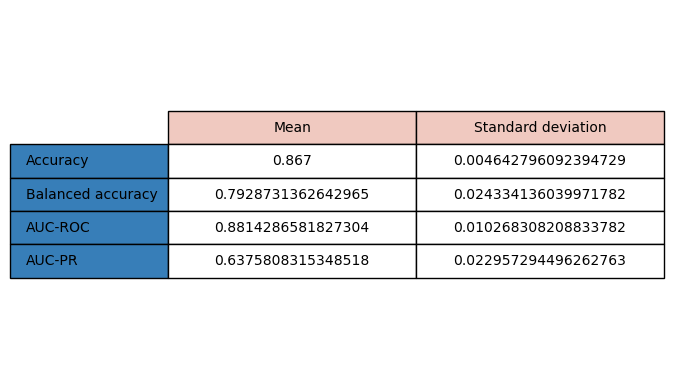

In [23]:
test01=summary_classifier(X_scaled,Ytrain)
plot_mean_sd(test01)

Performance for folder 1
Accuracy is 0.8683333333333333
balanced accuracy is 0.7891659235887235
AUC-ROC is 0.8846371493243705
AOC-PR is  0.6480127150530868

Performance for folder 2
Accuracy is 0.875
balanced accuracy is 0.8116640373139448
AUC-ROC is 0.9015879004046916
AOC-PR is  0.6765215807396848

Performance for folder 3
Accuracy is 0.845
balanced accuracy is 0.753155223266342
AUC-ROC is 0.8641710679744838
AOC-PR is  0.6120681883672914

Performance for folder 4
Accuracy is 0.86
balanced accuracy is 0.7839357980657109
AUC-ROC is 0.8862747787914123
AOC-PR is  0.6487107477311723

Performance for folder 5
Accuracy is 0.8816666666666667
balanced accuracy is 0.8169709055581122
AUC-ROC is 0.889221250703073
AOC-PR is  0.660701775508133



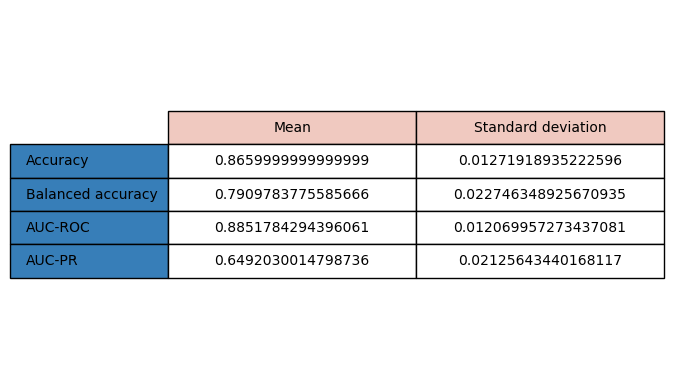

In [25]:
test02=summary_classifier(X_train_minmax,Ytrain)
plot_mean_sd(test02)

Performance for folder 1
Accuracy is 0.8683333333333333
balanced accuracy is 0.7677995747307771
AUC-ROC is 0.863733795184855
AOC-PR is  0.6074330926646698

Performance for folder 2
Accuracy is 0.88
balanced accuracy is 0.8300637903834283
AUC-ROC is 0.8985012689484875
AOC-PR is  0.6716758924135974

Performance for folder 3
Accuracy is 0.8683333333333333
balanced accuracy is 0.8227416146512107
AUC-ROC is 0.9044001646203443
AOC-PR is  0.6710451112158105

Performance for folder 4
Accuracy is 0.875
balanced accuracy is 0.8025070306605391
AUC-ROC is 0.8935883805473627
AOC-PR is  0.6650603468750494

Performance for folder 5
Accuracy is 0.875
balanced accuracy is 0.806744388198599
AUC-ROC is 0.8954509041945766
AOC-PR is  0.6612375322313752



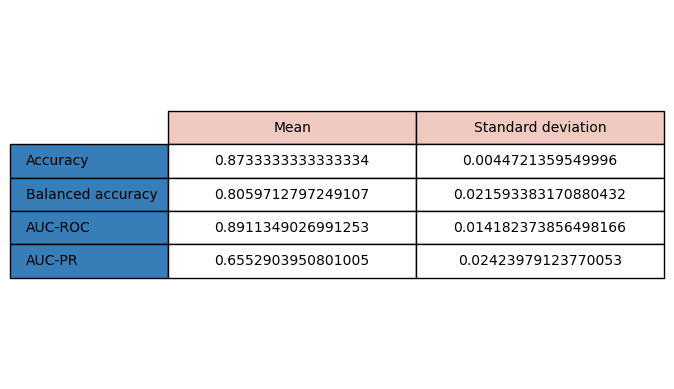

In [26]:
test03=summary_classifier(X_train_maxabs,Ytrain)
plot_mean_sd(test03)

Performance for folder 1
Accuracy is 0.8866666666666667
balanced accuracy is 0.8708759174154606
AUC-ROC is 0.9340061046711023
AOC-PR is  0.7069858975419685

Performance for folder 2
Accuracy is 0.8833333333333333
balanced accuracy is 0.8626791961039852
AUC-ROC is 0.9070752452157214
AOC-PR is  0.6666179615110477

Performance for folder 3
Accuracy is 0.89
balanced accuracy is 0.8760203031758007
AUC-ROC is 0.916420879347006
AOC-PR is  0.6766816329497989

Performance for folder 4
Accuracy is 0.8616666666666667
balanced accuracy is 0.8429761986418822
AUC-ROC is 0.9044173125728788
AOC-PR is  0.6300736954268401

Performance for folder 5
Accuracy is 0.8866666666666667
balanced accuracy is 0.8744183668251777
AUC-ROC is 0.9420923454517565
AOC-PR is  0.7437328555406196



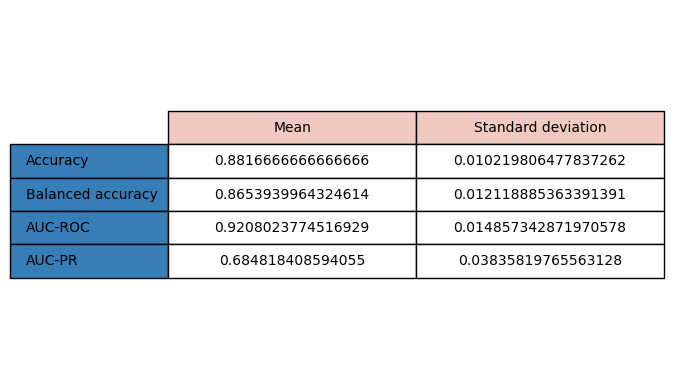

In [27]:
test04=summary_classifier(X_normalized,Ytrain)
plot_mean_sd(test04)

scaled


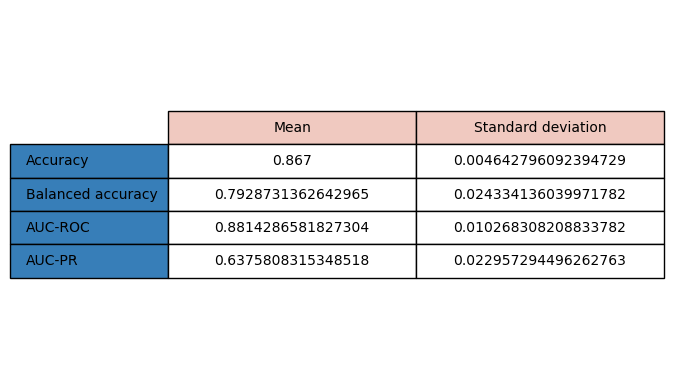

minmax


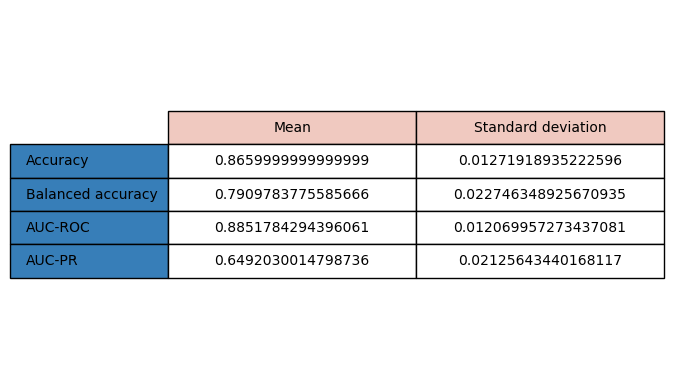

maxabs


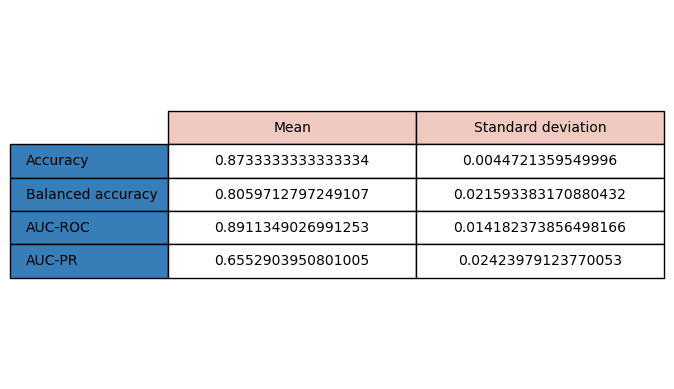

normalized


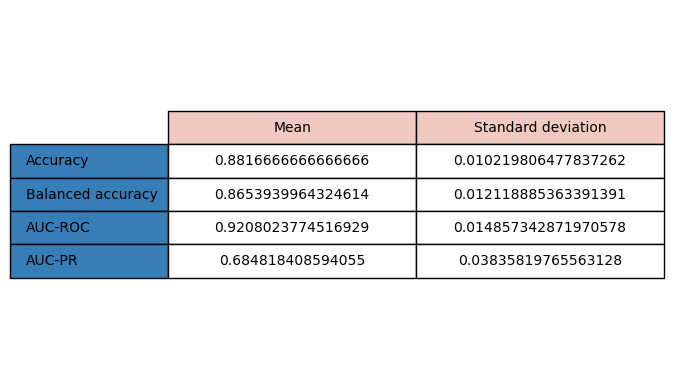

In [28]:
print("scaled")
plot_mean_sd(test01)
print("minmax")
plot_mean_sd(test02)
print("maxabs")
plot_mean_sd(test03)
print("normalized")
plot_mean_sd(test04)




pre-process method affects the performance of the classifier,accuracy fornormalizer has best performance overall, it has the highest accuracy and pr value. normalizer increased the performance of the model. Normalization can reduce the influence of extreme large or small value on specific direction and improve the model performance.
The minmax and the maxabs 's performance doesn't have significant difference with non preprocessing.
standard scaler reduced the accuracy and precision-recall score because when the distance between objects has meaning, the standard scaler could harm the classifier performance. in this data set objects are highly related to each other as the object are pixels , scaling the data is not a good idea.

Question No. 3: [20% Marks] CV
Use 5-fold stratified cross-validation over training data to choose an optimal classifier between: Perceptron, Naïve Bayes Classifier, Linear SVM and Kernelized SVM. Be sure to tune the hyperparameters of each classifier type (C and kernel type and kernel hyper-parameters for SVM etc). Report the cross validation results (mean and standard deviation of accuracy, balanced accuracy, AUC-ROC and AUC-PR across fold) of your best model. You may look into grid search as well as ways of pre-processing data.






i.Write your strategy for selecting the optimal classifier. Show code to demonstrate the results for each classifier. 

The strategy is use grid search to find the best parameter for each classifier, then compare the average_precion_score bwteen models to find optimal classifier.

In [29]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split, GridSearchCV
# first write necessary functions 
# get the skf folder 
def skf_get(Xtrain,Ytrain):
    skf = StratifiedKFold(n_splits=5,shuffle = True)
    xtrain=[]
    ytrain=[]
    xtest=[]
    ytest=[]
    for i,(train_index, test_index) in enumerate(skf.split(Xtrain, Ytrain)):
        xtrain.append(Xtrain[train_index])
        ytrain.append(Ytrain[train_index])
        ytest.append(Ytrain[test_index])
        xtest.append(Xtrain[test_index])
    return xtrain,ytrain,xtest,ytest
# get the predict value and predict probability




def get_performance(ytest,predict_value,p_pro):
    # accuracy
    accuracy = accuracy_score(ytest, predict_value)
    # balanced accuracy
    balanced = balanced_accuracy_score(ytest, predict_value)
    # ROC value fpr and tpr
    fpr, tpr, thres = roc_curve(ytest, p_pro)
    roc = auc(fpr, tpr)
    # PR value precision and recall
    precision, recall, thres_pr = precision_recall_curve(ytest, p_pro)
    
    pr = average_precision_score(ytest,p_pro)
    
    
    return accuracy,balanced,roc,pr,fpr,tpr,precision,recall

def summary_classifier2(Xtrain,Ytrain,func):
    predict_list=[]
    accuracy_list=[]
    balanced_list=[]
    roc_list=[]
    pr_list=[]
    fpr_list=[]
    tpr_list=[]
    precision_list=[]
    recall_list=[]
    xtrain,ytrain,xtest,ytest=skf_get(Xtrain,Ytrain)
    for i in range(5):
        predict_knn,predict_p=func(xtrain[i],ytrain[i],xtest[i])
        
        #Get performance for each folder
        accuracy,balanced,roc,pr,fpr,tpr,precision,recall=get_performance(ytest[i],predict_knn,predict_p)
        #Print the results
        print("Performance for folder",i+1)
        print("Accuracy is",accuracy)
        print("balanced accuracy is",balanced)
        print("AUC-ROC is",roc)
        print("AOC-PR is ",pr)
        
        print()
        # Get the list for calculate mean and std
        accuracy_list.append(accuracy)
        balanced_list.append(balanced)
        roc_list.append(roc)
        pr_list.append(pr)
        fpr_list.append(fpr)
        tpr_list.append(tpr)
        precision_list.append(precision)
        recall_list.append(recall)
    return accuracy_list,balanced_list,roc_list,pr_list,fpr_list,tpr_list,precision_list,recall_list


def plot_mean_sd(data):
    accuracy_list,balanced_list,roc_list,pr_list,fpr_list,tpr_list,precision_list,recall_list=data
    # get the sd and mean 
    data = [[np.mean(accuracy_list), np.std(accuracy_list)], 
           [np.mean(balanced_list), np.std(balanced_list)], 
           [np.mean(roc_list), np.std(roc_list)], 
           [np.mean(pr_list), np.std(pr_list)]]

    rows = ['Accuracy', 'Balanced accuracy', 'AUC-ROC', 'AUC-PR']
    rowColours=["#377eb8","#377eb8","#377eb8","#377eb8"]

    columns = ['Mean', 'Standard deviation']
    colColours=["#F0C9C0","#F0C9C0"]
    fig, ax = plt.subplots()
    ax.axis('tight')
    ax.axis('off')
    result_table = ax.table(cellText=data,rowLabels=rows,colLabels=columns, colColours=colColours,
         rowColours=rowColours,cellLoc = 'center',
                         loc='center')

    result_table.scale(1,2)
    plt.show()


    


In [30]:

from sklearn import preprocessing
import numpy as np
Xtrain = np.loadtxt("Xtrain.csv")# load Xtrain
Ytrain = np.loadtxt("Ytrain.csv")#load Ytrain
#Standardization
scaler = preprocessing.StandardScaler().fit(Xtrain)
X_scaled = scaler.transform(Xtrain)
# min max scaler
min_max_scaler = preprocessing.MinMaxScaler().fit(Xtrain)
X_train_minmax = min_max_scaler.transform(Xtrain)
# max abs scaler
max_abs_scaler = preprocessing.MaxAbsScaler().fit(Xtrain)
X_train_maxabs = max_abs_scaler.transform(Xtrain)
# Normalization
normalizer = preprocessing.Normalizer().fit(Xtrain)
X_normalized=normalizer.transform(Xtrain)
# get best parameter for perceptron
param_grid = {'penalty': ['l1', 'l2'],
                    'alpha': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1],
            'fit_intercept': [True, False],
                 'max_iter': [100, 500,1000]}
# make the test quicker"

# Initialize the Perceptron model
perceptron = Perceptron()

# Use GridSearchCV and  5-fold cross-validation
# Use the normalized data
grid_search = GridSearchCV(perceptron, param_grid, cv=5,scoring='average_precision')
normalizer = preprocessing.Normalizer().fit(Xtrain)
X_normalized=normalizer.transform(Xtrain)
# test which preprocess is the best
#grid_search.fit(X_scaled, Ytrain)
#grid_search.fit(X_train_minmax , Ytrain)
#grid_search.fit(X_train_maxabs, Ytrain)
grid_search.fit(X_normalized, Ytrain)
# Get the best hyperparameters
best_params_p1 = grid_search.best_params_
best_scorep=grid_search.best_score_

print("best parameter using pr scoring",best_params_p1)
print('best precision',best_scorep)
# We can see that  Normalizer is the best preprocess
# X_scaled is 0.60011 train is 0.646519  maxabs is 0.6465 normalized is 0.7004

best parameter using pr scoring {'alpha': 0.0001, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2'}
best precision 0.7004150868595856


In [31]:
def perceptron_clf(xtr,ytr,Xt):
    # Train the Perceptron model with the best hyperparameters
    perceptron = Perceptron(**best_params_p1)
    perceptron.fit(xtr, ytr)

    # Evaluate the Perceptron model on the test set
    pred = perceptron.predict(Xt)
    pro=perceptron.decision_function(Xt)
    return pred,pro

In [35]:
from sklearn import preprocessing
import numpy as np
Xtrain = np.loadtxt("Xtrain.csv")# load Xtrain
Ytrain = np.loadtxt("Ytrain.csv")#load Ytrain
normalizer = preprocessing.Normalizer().fit(Xtrain)
X_normalized=normalizer.transform(Xtrain)




Performance for folder 1
Accuracy is 0.865
balanced accuracy is 0.7473935112147609
AUC-ROC is 0.901382124974278
AOC-PR is  0.6895630759320822

Performance for folder 2
Accuracy is 0.8516666666666667
balanced accuracy is 0.7909150147472392
AUC-ROC is 0.9012277934014679
AOC-PR is  0.6847107253814291

Performance for folder 3
Accuracy is 0.855
balanced accuracy is 0.7563790383428219
AUC-ROC is 0.9033541395157417
AOC-PR is  0.6822934861161564

Performance for folder 4
Accuracy is 0.8683333333333333
balanced accuracy is 0.7800089169353179
AUC-ROC is 0.8821249742780712
AOC-PR is  0.6637578215761603

Performance for folder 5
Accuracy is 0.865
balanced accuracy is 0.7431354502224268
AUC-ROC is 0.8937464846346577
AOC-PR is  0.672237684112725



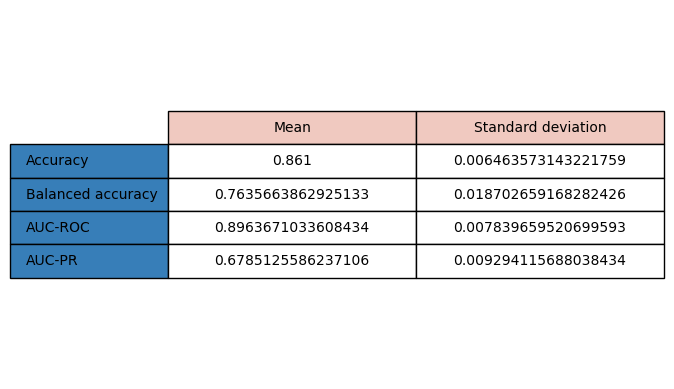

In [34]:
t1=summary_classifier2(X_normalized,Ytrain,perceptron_clf)
plot_mean_sd(t1)

In [37]:
from sklearn.naive_bayes import GaussianNB
# find bayesian paramter
param_grid = {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}



bayes = GaussianNB()
    
# Use GridSearchCV to perform 5-fold cross-validation and search for the best hyperparameters 
# Only use use averageprecision scoring, 
grid_search = GridSearchCV(bayes, param_grid, cv=5,scoring='average_precision')
#grid_search.fit(X_scaled, Ytrain)
#grid_search.fit(X_train_minmax , Ytrain)
#grid_search.fit(X_train_maxabs, Ytrain)
grid_search.fit(X_normalized, Ytrain)


# Get the best hyperparameters
best_params_b = grid_search.best_params_
best_scoreb=grid_search.best_score_
print("Best parameter is:", best_params_b)
print('Best precision is:',best_scoreb)
#     scaled=0.4284  minmax=0.4317  maxabs= 0.4317 Normalizer=0.5067
#normalizer is the best

Best parameter is: {'var_smoothing': 1e-09}
Best precision is: 0.5067306787163149


In [38]:
#Naive bayes

#define the classifier
def bayesian_clf(xtr,ytr,Xt):
    
    # Train the Bayes model with the best hyperparameters
    bayes = GaussianNB(**best_params_b)
    bayes.fit(xtr, ytr)

    # Evaluate the bayes model's performance
    pred = bayes.predict(Xt)
    pro=bayes.predict_proba(Xt)[:,1]
    return pred,pro

Performance for folder 1
Accuracy is 0.7833333333333333
balanced accuracy is 0.7907606831744289
AUC-ROC is 0.8497324919404623
AOC-PR is  0.5073013250940331

Performance for folder 2
Accuracy is 0.7616666666666667
balanced accuracy is 0.7954763701214075
AUC-ROC is 0.8304924891967899
AOC-PR is  0.46325752450330504

Performance for folder 3
Accuracy is 0.8066666666666666
balanced accuracy is 0.7993003635365937
AUC-ROC is 0.8645397489539749
AOC-PR is  0.5285206726155739

Performance for folder 4
Accuracy is 0.805
balanced accuracy is 0.8318300294944784
AUC-ROC is 0.8601584470814184
AOC-PR is  0.5176676067055282

Performance for folder 5
Accuracy is 0.8033333333333333
balanced accuracy is 0.8220074653576724
AUC-ROC is 0.867038230130729
AOC-PR is  0.534438333492568



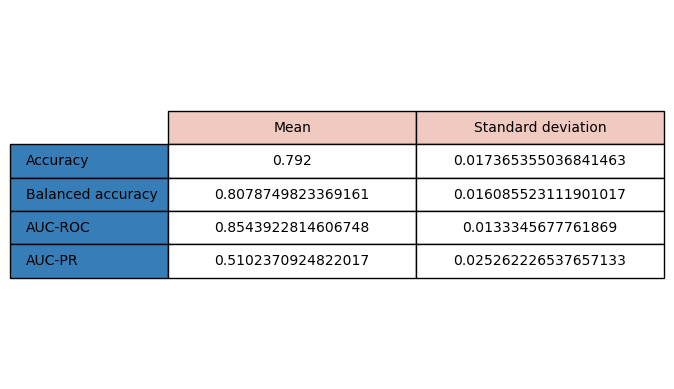

In [39]:

t2=summary_classifier2(X_normalized,Ytrain,bayesian_clf)
plot_mean_sd(t2)

In [41]:
from sklearn.svm import SVC, LinearSVC
from sklearn import preprocessing

param_grid =  param_grid ={ 'C':[0.0001,0.001,0.01,0.1,1,100]}
# find best parameter for linear svm model
grid_search = GridSearchCV(SVC(kernel='linear'),param_grid, refit=True, verbose=2,scoring='average_precision')
#grid_search.fit(X_scaled, Ytrain)
#grid_search.fit(X_train_minmax , Ytrain)
#grid_search.fit(X_train_maxabs, Ytrain)
grid_search.fit(X_normalized, Ytrain)
# Get the best hyperparameters
best_params_s = grid_search.best_params_
best_scores=grid_search.best_score_
print("Best parameter for SVM is:", best_params_s)
print("best precision for SVM is:",best_scores)
# scaled =0.699   minmax=0.7017   normalized=0.7233

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ...........................................C=0.0001; total time=   0.5s
[CV] END ...........................................C=0.0001; total time=   0.5s
[CV] END ...........................................C=0.0001; total time=   0.5s
[CV] END ...........................................C=0.0001; total time=   0.5s
[CV] END ...........................................C=0.0001; total time=   0.5s
[CV] END ............................................C=0.001; total time=   0.5s
[CV] END ............................................C=0.001; total time=   0.5s
[CV] END ............................................C=0.001; total time=   0.5s
[CV] END ............................................C=0.001; total time=   0.5s
[CV] END ............................................C=0.001; total time=   0.5s
[CV] END .............................................C=0.01; total time=   0.5s
[CV] END ........................................

In [42]:
# Linear SVM Method

from sklearn.svm import SVC, LinearSVC

def svm_clf(xtr,ytr,Xt):
   
    # Train the linear svm model with the best hyperparameters on the entire training set
    svc = LinearSVC(**best_params_s,dual=False)
    svc.fit(xtr, ytr)

    # Evaluate the linear svm model on the test set
    
    pred = svc.predict(Xt)
    
    
    pro=svc.decision_function(Xt)
    return pred,pro


Performance for folder 1
Accuracy is 0.8683333333333333
balanced accuracy is 0.7800089169353179
AUC-ROC is 0.9008505384457096
AOC-PR is  0.7131115858761704

Performance for folder 2
Accuracy is 0.8616666666666667
balanced accuracy is 0.7666678098635022
AUC-ROC is 0.9046059400507579
AOC-PR is  0.684986477828391

Performance for folder 3
Accuracy is 0.8683333333333333
balanced accuracy is 0.7525378969751011
AUC-ROC is 0.9115337128746828
AOC-PR is  0.7415713950002706

Performance for folder 4
Accuracy is 0.87
balanced accuracy is 0.7871596131421909
AUC-ROC is 0.8803758831195555
AOC-PR is  0.6904085119767116

Performance for folder 5
Accuracy is 0.8866666666666667
balanced accuracy is 0.823132382267219
AUC-ROC is 0.9219034957645175
AOC-PR is  0.74291658201788



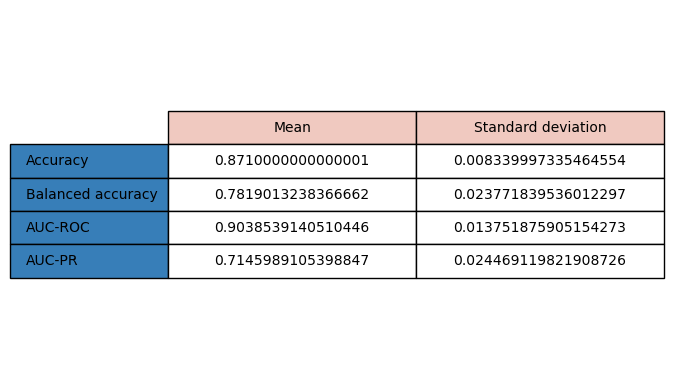

In [43]:


t3=summary_classifier2(X_normalized,Ytrain,svm_clf)
plot_mean_sd(t3)

In [44]:


# Define the parameter grid
param_grid = {'C': [0.1, 1, 10], 
                  'gamma': [0.1, 0.01],
                  'kernel': ['rbf', 'poly', 'sigmoid']}
    
# Initialize the Bayesian model
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2,scoring='average_precision')
grid_search.fit(X_normalized, Ytrain)
        
# Get the best hyperparameters
best_params_ks = grid_search.best_params_
best_scoreks=grid_search.best_score_
print("Best parameter is:", best_params_ks)
print("Best precision score is:",best_scoreks)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.5s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.5s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.5s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.5s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.5s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   0.5s
[CV] END ...................C=0.1, gamma=0.1, ke

In [45]:
#kernel svm
def k_clf(xtr,ytr,Xt):
    
    svc = SVC(**best_params_ks)
    svc.fit(xtr, ytr)

    # Evaluate the linear svm model on the test set
    
    pred = svc.predict(Xt)
    
    pro=svc.decision_function(Xt)
    
    return pred,pro


Performance for folder 1
Accuracy is 0.8683333333333333
balanced accuracy is 0.7891659235887235
AUC-ROC is 0.9061664037313945
AOC-PR is  0.7003985993278798

Performance for folder 2
Accuracy is 0.86
balanced accuracy is 0.7900404691679813
AUC-ROC is 0.9046916798134302
AOC-PR is  0.6746221156595664

Performance for folder 3
Accuracy is 0.8683333333333333
balanced accuracy is 0.8105322724466699
AUC-ROC is 0.9184443377460731
AOC-PR is  0.7282198648937126

Performance for folder 4
Accuracy is 0.86
balanced accuracy is 0.7778311269634406
AUC-ROC is 0.9091158515673229
AOC-PR is  0.700299298272561

Performance for folder 5
Accuracy is 0.87
balanced accuracy is 0.8005829114894922
AUC-ROC is 0.9150858175248419
AOC-PR is  0.7317022018878583



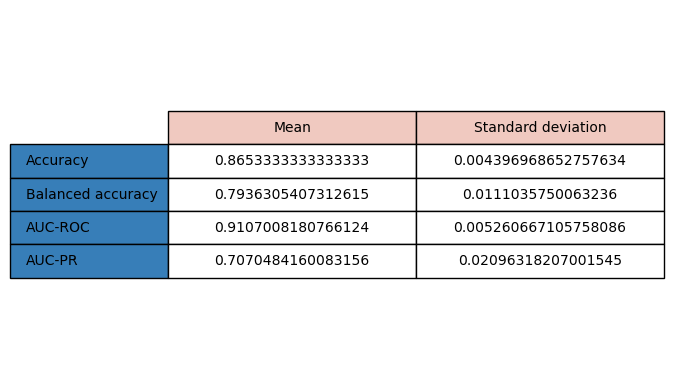

In [46]:


t4=summary_classifier2(X_normalized,Ytrain,k_clf)
plot_mean_sd(t4)

ii. Show the comparison of these classifiers using a single consolidated table.

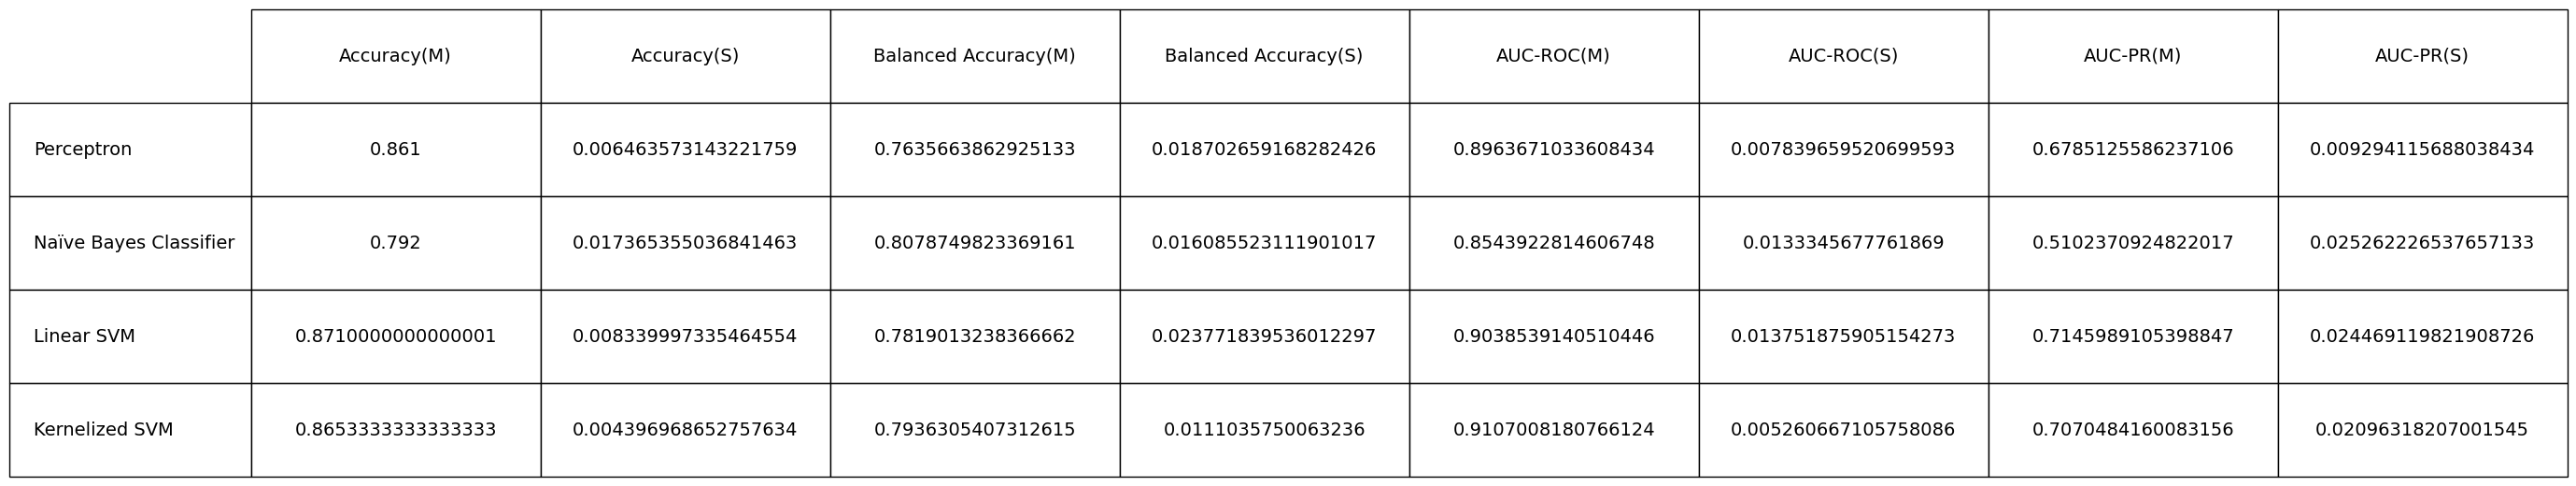

In [47]:
def sum_list(data):
    accuracy_list,balanced_list,roc_list,pr_list,fpr_list,tpr_list,precision_list,recall_list=data
    data = [np.mean(accuracy_list), np.std(accuracy_list), 
           np.mean(balanced_list), np.std(balanced_list), 
           np.mean(roc_list), np.std(roc_list), 
           np.mean(pr_list), np.std(pr_list)]
    return data
data=[sum_list(t1),sum_list(t2),sum_list(t3),sum_list(t4)]
rows=['Perceptron','Naïve Bayes Classifier','Linear SVM','Kernelized SVM']
columns=['Accuracy(M)', 'Accuracy(S)', 
        'Balanced Accuracy(M)', 'Balanced Accuracy(S)',
        'AUC-ROC(M)', 'AUC-ROC(S)',
        'AUC-PR(M)', 'AUC-PR(S)']



fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
result_table = ax.table(cellText=data,rowLabels=rows,colLabels=columns,
         cellLoc = 'center',loc='center')
result_table.auto_set_font_size(False)
result_table.set_fontsize(14)
result_table.scale(5, 6)


The best classifier is kernelized svm with normalized pre process,best parameter {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}. scoring is avrage_precision_score. but performance of linear svm is with C=1 is close, in fact some times Linear SVM has better performance, some times kernlized SVM is better.

<function matplotlib.pyplot.show(close=None, block=None)>

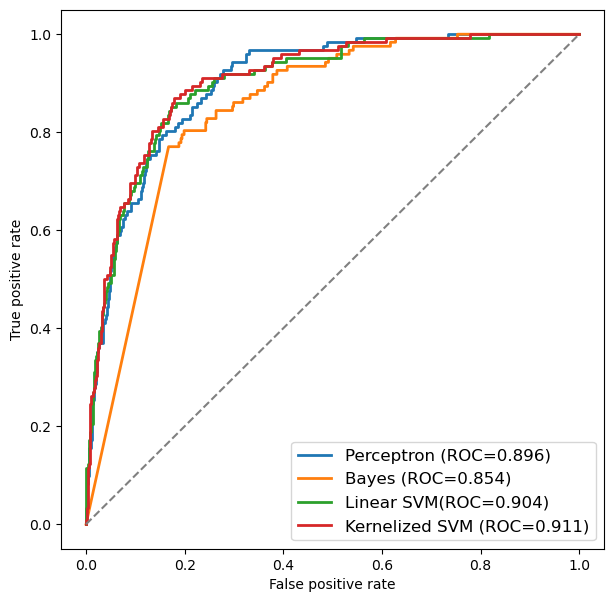

In [48]:
# Creat the figure

fig,ax = plt.subplots(figsize=(7, 7))
# tn[4][i] is fpr, tn[5][i] is tpr
ax.plot(t1[4][0], t1[5][0], linewidth=2, 
        label='Perceptron (ROC={})'.format(str(round(data[0][4],3))))

ax.plot(t2[4][0], t2[5][0], linewidth=2, 
        label='Bayes (ROC={})'.format(str(round(data[1][4],3))))

ax.plot(t3[4][0], t3[5][0], linewidth=2, 
        label='Linear SVM(ROC={})'.format(str(round(data[2][4],3))))

ax.plot(t4[4][0], t4[5][0], linewidth=2, 
        label='Kernelized SVM (ROC={})'.format(str(round(data[3][4],3))))
ax.set_xlabel('False positive rate')
ax.set_ylabel('True positive rate')
# Draw diagonal lines
ax.plot([0,1],[0,1],linestyle='--',color='grey')

plt.legend(fontsize=12)
plt.show

iii. Plot the ROC curves of all classifiers on the same axes for easy comparison.

iv. Plot the PR curves of all classifier on the same axes for comparison.

<function matplotlib.pyplot.show(close=None, block=None)>

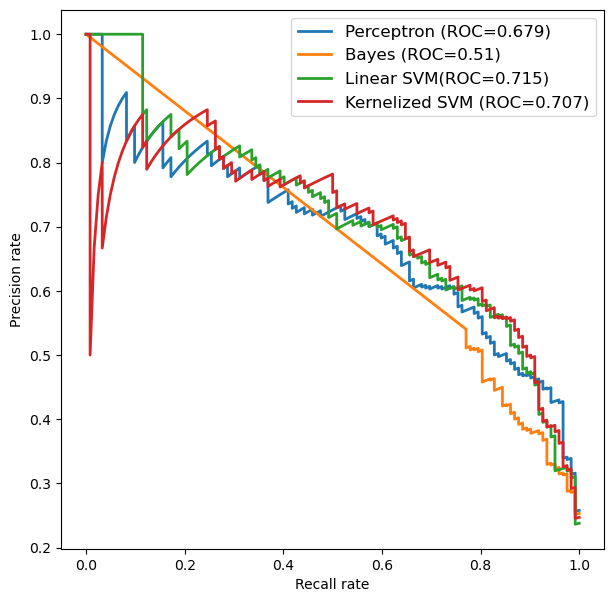

In [49]:
# Creat the figure
 # Creat the figure
# tn[7][i] is recall, tn[6][i] is precision
fig,ax = plt.subplots(figsize=(7, 7))

ax.plot(t1[7][0], t1[6][0], linewidth=2, 
        label='Perceptron (ROC={})'.format(str(round(data[0][6],3))))

ax.plot(t2[7][0], t2[6][0], linewidth=2, 
        label='Bayes (ROC={})'.format(str(round(data[1][6],3))))

ax.plot(t3[7][0], t3[6][0], linewidth=2, 
        label='Linear SVM(ROC={})'.format(str(round(data[2][6],3))))

ax.plot(t4[7][0], t4[6][0], linewidth=2, 
        label='Kernelized SVM (ROC={})'.format(str(round(data[3][6],3))))
ax.set_xlabel('Recall rate')
ax.set_ylabel('Precision rate')


plt.legend(fontsize=12)
plt.show


v. Write your observations about the ROC and PR curves.

kernelized SVM has the largest  roc and pr rate(some times linear svm is better, they are close), we can see that in ROC figure the curve is at the left top side, and in PR figure the curve is at the top right side, the AUC ROC and AUC PR for svm model is the largest among all as the curve is at the top side .  This supports the finding that kernalized SVM is the best classifier for this case. 
we can see that bayes classifier‘s curve  is close to stright line,showing the performance of bayesian classifier is bad. This is because of bayesian classifier assume object attributes are independant, but in the graph data,  value in different dimensions are highly correlated

In [ ]:
Question No. 4 [20% Marks] PCA

i. Reduce the number of dimensions of the training data using PCA to 2 and plot a scatter plot of the training data showing examples of each class in a different color. What are your observations about the data based on this plot?

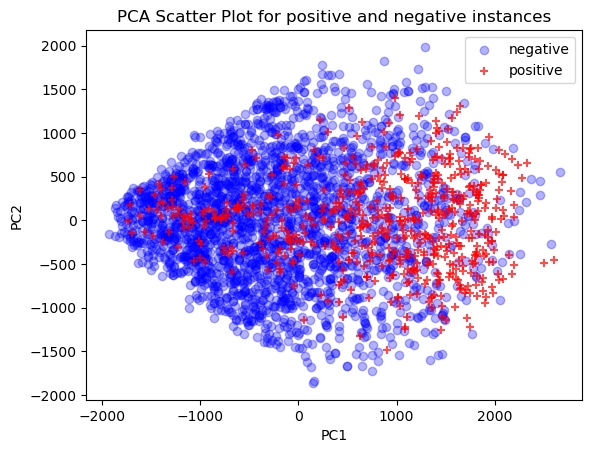

In [50]:
# packages for Q4
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
#load data for Q4
Xtrain4 = np.loadtxt("Xtrain.csv")
Ytrain4 = np.loadtxt("Ytrain.csv")
Xtest4=np.loadtxt("Xtest.csv")

# Use PCA to reduce the Xtrain data to  2 dimensions 

pca2 = PCA(n_components=2)
pca2.fit(Xtrain4)
Z = pca2.transform(Xtrain4)

# Plot a scatter plot of the reduced data
plt.scatter(Z[Ytrain4 == -1, 0], Z[Ytrain4 == -1, 1], color='blue', label='negative',marker='o', alpha=0.3)
plt.scatter(Z[Ytrain4 == 1, 0], Z[Ytrain4 == 1, 1], color='red', label='positive',marker='+', alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.title("PCA Scatter Plot for positive and negative instances")
plt.show()



Answer, The red + means positive instances and blue o means negative instances. We can see that most of the positive instances are larger than 0 on pca demension 1. Most of the negative instances are smaller than 0 on pca demension 1. positive and negative instances has similar distribution on PC dimension 2, so this dimension is not that useful for classification. The distrubution of positive and negative instances  on pca is not different from each other. There is more  Negative instances because the dataset is not balanced. 
Negative objects are better clustered, so the false positive rate could be lower than false negative rate.This explains why accuracy value is higher than precision. Negative objects can be better predicted.

ii. Reduce the number of dimensions of the training and test data together using PCA to 2 and plot a scatter plot of the training and test data showing examples of each set in a different color (or marker style). What are your observations about the data based on this plot?

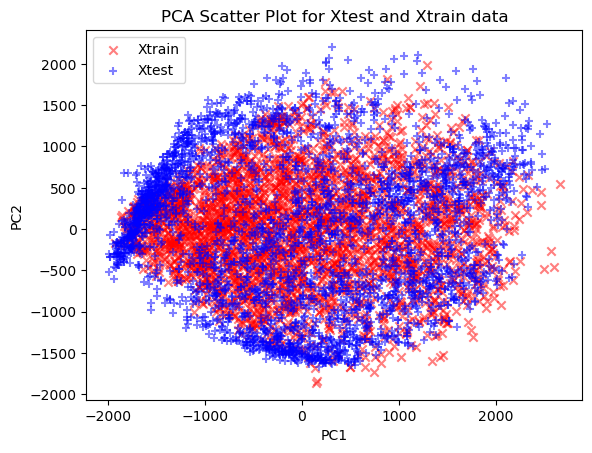

In [51]:
# Use PCA to reduce the Xtest data to  2 dimensions 
pca2 = PCA(n_components=2)
pca2.fit(Xtest4)
Z_test = pca2.transform(Xtest4)


plt.scatter(Z[:, 0], Z[:, 1], color='red', label='Xtrain',marker='x', alpha=0.5)
plt.scatter(Z_test[:, 0], Z_test[:, 1], color='blue', label='Xtest',marker='+', alpha=0.5)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.title("PCA Scatter Plot for Xtest and Xtrain data")
plt.show()

Test data are distributed at the edge of the circle and has multiple center , a large amount of test dara was located in PC2(-500:1500) and PC1(-2000:-1000). Train data are located closer to the center of the graph and test data are  more concentrated. They have the same number of instances bur the blue area is much smaller than red area , showing test object are better clustered, and test value can be better predicted.

iii. Plot the scree graph of PCA and find the number of dimensions that explain 95% variance in the training set.

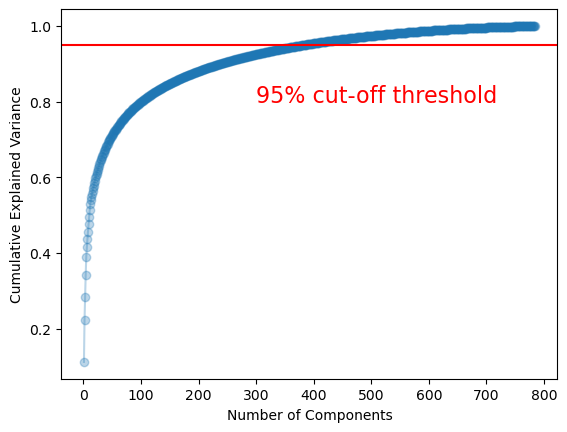

Number of dimensions to explain 95% variance: 384


In [52]:

#expalained _variance
pca = PCA()
Z = pca.fit_transform(X_normalized)
explained_variance = pca.explained_variance_ratio_

plt.plot(np.arange(len(pca.explained_variance_ratio_))+1,np.cumsum(explained_variance),'o-',alpha=0.3)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(300, 0.8, '95% cut-off threshold', color = 'red', fontsize=16)
plt.show()


cumulative_explained_variance = np.cumsum(explained_variance)
num_dimensions = np.argmax(cumulative_explained_variance >= 0.95) + 1
print("Number of dimensions to explain 95% variance:", num_dimensions)

if data is not normalized then the value should be 314.

iv. Reduce the number of dimensions of the data using PCA and perform classification. What is the (optimal) cross-validation performance of a Kernelized SVM classification with PCA? Remember to perform hyperparameter optimization!

In [53]:
from sklearn.decomposition import PCA


pca = PCA(n_components=384)

X_pca = pca.fit_transform(Xtrain4)
normalizer_pca = preprocessing.Normalizer().fit(X_pca)
pca_normalized=normalizer_pca.transform(X_pca)
# Define the parameter grid
param_grid = {'C': [0.1, 1, 10], 
                  'gamma': [10,1, 0.1,0.01],
                  'kernel': ['rbf', 'poly', 'sigmoid']}
    
# Initialize the Bayesian model
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2,scoring='average_precision')
grid_search.fit(pca_normalized, Ytrain4)
        
# Get the best hyperparameters
best_params_kspca = grid_search.best_params_
best_scorekspca=grid_search.best_score_
print("Best parameter is:", best_params_kspca)
print("Best precision score is:",best_scorekspca)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   0.9s
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   0.9s
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   0.9s
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   0.9s
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   0.9s
[CV] END .......................C=0.1, gamma=10, kernel=poly; total time=   0.5s
[CV] END .......................C=0.1, gamma=10, kernel=poly; total time=   0.5s
[CV] END .......................C=0.1, gamma=10, kernel=poly; total time=   0.5s
[CV] END .......................C=0.1, gamma=10, kernel=poly; total time=   0.5s
[CV] END .......................C=0.1, gamma=10, kernel=poly; total time=   0.5s
[CV] END ....................C=0.1, gamma=10, kernel=sigmoid; total time=   0.3s
[CV] END ....................C=0.1, gamma=10, k

In [54]:
def k_clf_pca(xtr,ytr,Xt):
    
    svc = SVC(**best_params_kspca)
    svc.fit(xtr, ytr)

    # Evaluate the linear svm model on the test set
    
    pred = svc.predict(Xt)
    
    pro=svc.decision_function(Xt)
    
    return pred,pro

Performance for folder 1
Accuracy is 0.8683333333333333
balanced accuracy is 0.7800089169353179
AUC-ROC is 0.9202620207147266
AOC-PR is  0.7371769322374948

Performance for folder 2
Accuracy is 0.8716666666666667
balanced accuracy is 0.7607346182865766
AUC-ROC is 0.9134714315110776
AOC-PR is  0.7622488317829144

Performance for folder 3
Accuracy is 0.8716666666666667
balanced accuracy is 0.7576822827354414
AUC-ROC is 0.8952260100144043
AOC-PR is  0.7641722435223729

Performance for folder 4
Accuracy is 0.8716666666666667
balanced accuracy is 0.7973626449001989
AUC-ROC is 0.9112079017765279
AOC-PR is  0.7399213859274278

Performance for folder 5
Accuracy is 0.8866666666666667
balanced accuracy is 0.8170987370251062
AUC-ROC is 0.9254827768403471
AOC-PR is  0.793168280424711



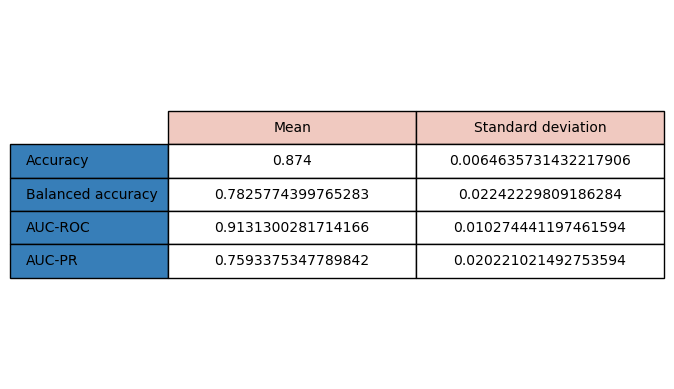

In [55]:


tpca=summary_classifier2(pca_normalized,Ytrain,k_clf_pca)
plot_mean_sd(tpca)

The optimal performance for Kernelized SVM classification is AUC-PR around0.759. 

The Best parameter is: {'C': 10, 'gamma': 1, 'kernel': 'poly'}
The Best precision score is: 0.7577808411622079
The performance is close to the K-SVM classifier without pca.

## Question No. 5 [15% Marks]
Develop an optimal pipeline for classification based on your analysis (Q1-Q4). You are free to use any tools or approaches at your disposal. However, no external data sources may be used. Describe your pipeline and report your outputs over the test data set. (You are required to submit your prediction file together with the assignment in a zip folder). Your prediction file should be a single column file containing the prediction score of the corresponding example in Xtest (be sure to have the same order as the order of the test examples in Xtest!). Your prediction file should be named by your student ID, e.g., u100011.csv.

In [57]:
Xtrain5 = np.loadtxt("Xtrain.csv")
Ytrain5 = np.loadtxt("Ytrain.csv")
Xtest5 = np.loadtxt("Xtest.csv")

from sklearn.pipeline import make_pipeline


In [65]:
# another way to find optimal parameter using pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler,Normalizer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.metrics import average_precision_score




# Split  into training and testing sets
X_train5, X_test5, Y_train5, Y_test5 = train_test_split(Xtrain5, Ytrain5, test_size=0.2)

# Create a pipeline for normalizing, , Kernelized SVM, pca
#  This method is very slow , so I only used few parameters.
pipe_svc = Pipeline([
    ('normalizing', Normalizer()),
    ('pca', PCA()),
    ('svc', SVC())
    

])
# pipe_svc.get_params().keys()
parameters = {
    'normalizing': [Normalizer(), None],
    'svc__kernel': ['rbf', 'poly'],
    'svc__C': [1, 10,20],
    'svc__gamma': [0.01, 0.1, 1],
    'pca__n_components': [500,784],
    


}
grid_search = GridSearchCV(pipe_svc, parameters, scoring='average_precision')

# Fit the grid search object on the training data
grid_search.fit(X_train5, Y_train5)
# Print the best hyperparameters and the precision score
print('Best hyperparameters:', grid_search.best_params_)
print('precision score:', grid_search.best_score_)
# we can see that the best hyperparameter is pre process = normalizer, c:10, kernel:rbf, pca_n_components=500
# is better. In fact the model without pca should have better accuracy


Best hyperparameters: {'normalizing': Normalizer(), 'pca__n_components': 784, 'svc__C': 1, 'svc__gamma': 0.01, 'svc__kernel': 'poly'}
precision score: 0.752673675845093


In [90]:
# use the best parameter calculated before to make prediction
# can simply use grid search predict function but I tried to use make pipeline as this question is test
#ing the skill using pipeline.
normalizer5 = preprocessing.Normalizer()

pipe5 = make_pipeline( normalizer5, SVC(C=1, kernel='poly', gamma=0.01))

pipe5.fit(Xtrain5, Ytrain5)
predict_y = pipe.predict(Xtest5)

result = pd.DataFrame({'predict' : predict_y})

result.to_csv('u2291588.csv', index=False, header=False)

r = np.loadtxt("u2291588.csv")
n_p=np.count_nonzero(r==1)
n_n=np.count_nonzero(r==-1)
print(n_p,n_n)

552 2448


  pca can not improve accuracy so this model will not use pca. This pipeline tested whether use normalization/ whether use pca and tested different parameters using kernielized SVM. We used these parameter setting because in Q3 we already have learned something about the best parameter.

One method is input the best parameter  in Q3 to the pipeline directly because pca will not improve accuracy. This method is quicker but need to manually change the code to compare preprocessing method ,pca and different classifiermodels.
another medthod is use grid_search in the pipeline to compare more paramter. This method can test many parameters at the same time.But including too many parameters will make the process slow.As testing parameter is too slow , I only tested few parameters. Normalizer() is better than no pre-processing,no pca is better than pca,  best c value is 1 and  best gamma is  0.01, the best kernel is  poly. The best precision socre using these paramter set  is 0.753.
Other classifier can also be used here to compare AUC-PR value.
we can see that 552 objects were predicted as positive and 2448 were predicted as negative.

positive object


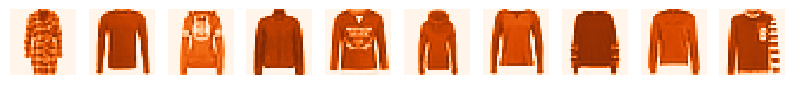

Negative object


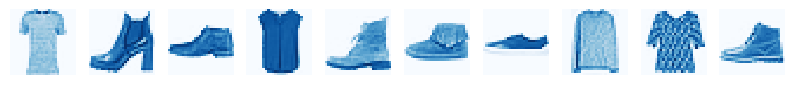

Test object


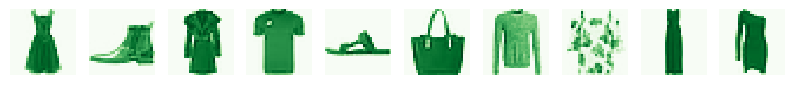

In [70]:
# show 10 randomly selected objetcs to have a look about whether classifier works fine
# random objects can not use np.choice.sample/choice because the object is not 1-dimensional.
positive=np.where(r==1)[0]
negative=np.where(r==-1)[0]
#Get positive and negative sublist in Xtrain
Xp=[]
Xn=[]
for i in range(len(positive)):
    index=positive[i]
    Xp.append(Xtest5[index])
for i in range(len(negative)):
    index=negative[i]
    Xn.append(Xtest5[index])



def sub_sample(dataset, n):
    set_n = len(dataset)
    sub_index = random.sample(range(1, set_n), n)
    sub_data =np.array(dataset)[sub_index]
    
    return sub_data

def show_sub_sample(dataset):
    fig=plt.figure(figsize=(28,28))
    for i in range(1,11):
        
        plt.matshow(dataset[i-1].reshape((28,28)),cmap=plt.cm.Blues)
    plt.show()
#get 10 random object from positive/negative set
randomp=sub_sample(Xp,10)
randomn=sub_sample(Xn,10)
#get 10 random object from Xtest set

randomt=sub_sample(Xtest,10)
#Show positive examples
fig,ax=plt.subplots(1,10,figsize=(10,1))
print("positive object")
for i in range(10):
    ax[i].matshow(randomp[i].reshape((28,28)),cmap=plt.cm.Oranges)
    ax[i].axis("off")
plt.show()
#Show negative examples
fig,ax=plt.subplots(1,10,figsize=(10,1))
print("Negative object")
for i in range(10):
    ax[i].matshow(randomn[i].reshape((28,28)),cmap=plt.cm.Blues)
    ax[i].axis("off")
plt.show()
#Show test examples
print("Test object")
fig,ax=plt.subplots(1,10,figsize=(10,1))
for i in range(10):
    ax[i].matshow(randomt[i].reshape((28,28)),cmap=plt.cm.Greens)
    ax[i].axis("off")
plt.show()


We can see that most of the predicted positive object are coats， suggesting the classifier works well.

## Question No. 6 [10% Marks]
Using the data given to you, consider an alternate classification problem in which the label of an example is based on whether it is a part of the training set (label = -1) or the test set (label = +1). Calculate the average and standard deviation of AUC-ROC using 5-fold stratified cross-validation for a classifier that is trained to solve this prediction task. What is the implication of this AUC-ROC value? Show code for this analysis and clearly explain your conclusions with supporting evidence.

In [79]:
from sklearn import preprocessing
Xtrain6= np.loadtxt("Xtrain.csv")
Xtest6 = np.loadtxt("Xtest.csv")
Xtrain_test = np.concatenate((Xtrain6, Xtest6))



In [82]:
Y = []
for i in range(len(Xtrain6)):
    Y.append(-1)
for i in range(len(Xtest6)):
    Y.append(1)
print(len(Y))
n_positive=Y.count(1)
n_negative=Y.count(-1)
print(n_positive,n_negative)

Y = np.array(Y)

6000
3000 3000


In [73]:
# another way to find optimal parameter using pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler,Normalizer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.metrics import average_precision_score




# Split  into training and testing sets
X_train5, X_test5, Y_train5, Y_test5 = train_test_split(Xtrain5, Ytrain5, test_size=0.2)

# Create a pipeline for normalizing, , Kernelized SVM, pca
#  This method is very slow , so I only used few parameters.
pipe_svc = Pipeline([
    ('pca', PCA()),
    ('svc', SVC())
    

])
# pipe_svc.get_params().keys()
parameters = {
    'svc__kernel': ['rbf', 'poly'],
    'svc__C': [20,50],
    'svc__gamma': [ 0.1, 1,10],
    'pca__n_components': [100,300,500],
    


}
grid_search = GridSearchCV(pipe_svc, parameters, scoring='average_precision')

# Fit the grid search object on the training data
grid_search.fit(X_train5, Y_train5)
# Print the best hyperparameters and the precision score
print('Best hyperparameters:', grid_search.best_params_)
print('precision score:', grid_search.best_score_)
# we can see that the best hyperparameter is pre process = normalizer, c:10, kernel:rbf, pca_n_components=500
# is better. In fact the model without pca should have better accuracy


Best hyperparameters: {'pca__n_components': 500, 'svc__C': 20, 'svc__gamma': 0.1, 'svc__kernel': 'poly'}
precision score: 0.6852004529446513


The best parameter for the first time is 
Best hyperparameters: {'pca__n_components': 500, 'svc__C': 20, 'svc__gamma': 1, 'svc__kernel': 'poly'}
precision score: 0.7219272910446058

We can see that pca can imrpove model as n_components=500 is better than 784, the reason could be that train data is blurred so test data includes some extra information. so reduce some information could profit the performance.
the second time shows that pca 500 is better than pca 100 and 300. So we are going to use pca=300
Best hyperparameters: {'pca__n_components': 500, 'svc__C': 20, 'svc__gamma': 0.1, 'svc__kernel': 'poly'}
precision score: 0.6852004529446513

In [84]:
from sklearn.decomposition import PCA


pca = PCA(n_components=500)
Xtt_pca = pca.fit_transform(Xtrain_test)
normalizer_pcatt = preprocessing.Normalizer().fit(Xtt_pca)
pca_tt=normalizer_pcatt.transform(Xtt_pca)
# Define the parameter grid
param_grid = {'C': [0.1, 1, 10], 
                  'gamma': [1, 0.1,0.01],
                  'kernel': ['rbf', 'poly']}
    
# Initialize the Bayesian model
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2,scoring='average_precision')
grid_search.fit(pca_tt, Y)
        
# Get the best hyperparameters
best_params_kspca = grid_search.best_params_
best_scorekspca=grid_search.best_score_
print("Best parameter is:", best_params_kspca)
print("Best precision score is:",best_scorekspca)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.5s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   2.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   2.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   2.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   2.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   2.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   3.5s
[CV] END .......................C=0.1, gamma=0.1

In [88]:
#Best parameter is C=10 gamma=1,kernel=rbf,  best precision score is 0.9979
def k_clf_pcatt(xtr,ytr,Xt):
    
    svc = SVC(**best_params_kspca)
    svc.fit(xtr, ytr)

    # Evaluate the linear svm model on the test set
    
    pred = svc.predict(Xt)
    
    pro=svc.decision_function(Xt)
    
    return pred,pro

Performance for folder 1
Accuracy is 0.9775
balanced accuracy is 0.9775
AUC-ROC is 0.9977305555555556
AOC-PR is  0.9978731962256515

Performance for folder 2
Accuracy is 0.98
balanced accuracy is 0.98
AUC-ROC is 0.9979638888888889
AOC-PR is  0.9983111279637908

Performance for folder 3
Accuracy is 0.98
balanced accuracy is 0.98
AUC-ROC is 0.9970444444444445
AOC-PR is  0.995957299642943

Performance for folder 4
Accuracy is 0.9791666666666666
balanced accuracy is 0.9791666666666666
AUC-ROC is 0.9967472222222222
AOC-PR is  0.9972402295875926

Performance for folder 5
Accuracy is 0.9841666666666666
balanced accuracy is 0.9841666666666666
AUC-ROC is 0.9974722222222222
AOC-PR is  0.9979272066930125



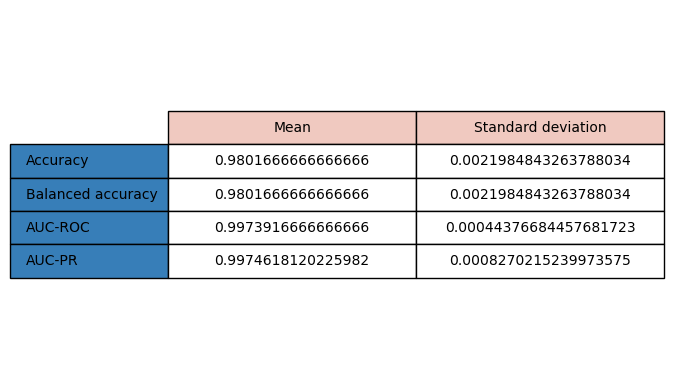

In [89]:

# used 
test6=summary_classifier2(pca_tt, Y,k_clf_pcatt)
plot_mean_sd(test6)

The performance of this classfier is very good,  AUC-PR is higher than accuracy. The data set is balanced as positive and negative data all have 3000 instances. Positive objects(test data) are better predicted as AUC-PR is larger than accuracy.  This  can be supported by the pca graph of test data and train data in Q4, which shows test data are closely gathered. As the data is perfectly balanced, the balanced accuracy is the same as accuracy.

The AUC ROC value is between 0.5 and 1. 0.5 means the classifier has no effect, 1 means perfect classifier. In this model, AUC-ROC is close to 1 ,which means the classifier has high authenticity

We can see from the example graph that test data and train data are clearly different. Test data are a lot more clearer than train data. It is not suprising that the classifier has very good performance. From the pca graph in Q4, we can see that when number of dimension is 2, we can already distinguish most of the test objects from the train objects. This model uses 500 dimensions,the accuracy and AUC-ROC value will be a lot higher than pca=2.

In this case, pca improved the performance of classifier. In some case, pca will drop the harmful nosie information then improve the performance of classifier. Not all information is useful for classification.  To distinguish test object and train object. Information about the shape of object is useless, the onlything matters is whether the graph is clear. for example data related to the edge of the graph. when the value nearby the edge siginificantly drops, this means the edge is more clear. So, dropping useless informationfor example  shape could improve the performance of the classifier. This is why pca n=500 is the best parameter